In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

pd.set_option("display.max_columns", 500)
plt.style.use("seaborn-colorblind")
pal = sns.color_palette()


<ipython-input-4-b680f444d1b3>:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-colorblind")


In [32]:
# correct the code below
# refer pandas documentation for the correct syntax
from google.colab import drive
drive.mount('/content/drive')

link = f'https://drive.google.com/uc?export=download&id=18-nsk-we3tAvCvAQYTfxyOT2pxMqWAbr'
df = pd.read_csv(link)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [33]:

df.head()
#similarly the first 31 rows

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.95256,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.00000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.52303,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.87618,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.22611,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive


In [34]:
print(df[:31])

    Age  Gender  Protein1  Protein2  Protein3  Protein4 Tumour_Stage  \
0    42  FEMALE  0.952560   2.15000  0.007972 -0.048340           II   
1    54  FEMALE  0.000000   1.38020 -0.498030 -0.507320           II   
2    63  FEMALE -0.523030   1.76400 -0.370190  0.010815           II   
3    78  FEMALE -0.876180   0.12943 -0.370380  0.132190            I   
4    42  FEMALE  0.226110   1.74910 -0.543970 -0.390210           II   
5    80  FEMALE  0.466470   2.57970 -1.253700  0.151540          III   
6    66  FEMALE -0.724860  -0.28289  0.959430  0.350900           II   
7    36  FEMALE  0.469310   1.55260 -0.165240 -0.275990          III   
8    58  FEMALE -1.268500   0.10613  1.135200 -0.394920           II   
9    62  FEMALE  0.649340   1.81680  0.279260  0.132280           II   
10   51  FEMALE -0.384660   0.80609 -1.627400 -0.512910           II   
11   40  FEMALE -0.565700   1.26680 -0.293460  0.193950           II   
12   77  FEMALE -0.206080   0.57751 -0.248560  0.000000         

In [35]:
#Check if the dataset has null values and specify those columns
#Enter code below
null_columns = df.columns[df.isnull().any()]

In [36]:
# Drop the entire column if the percentage of null values to the total rows is greater than 10%
# If less than 10% then drop the null values directly
#Enter code below
df = pd.read_csv(link)

null_percentages = df.isnull().mean() * 100

columns_to_drop = null_percentages[null_percentages > 10].index

df.drop(columns=columns_to_drop, inplace=True)

df.dropna(inplace=True)

In [37]:
df

,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,42,FEMALE,0.952560,2.15000,0.007972,-0.048340,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,20-May-18,26-Aug-18,Alive
1,54,FEMALE,0.000000,1.38020,-0.498030,-0.507320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,26-Apr-18,25-Jan-19,Dead
2,63,FEMALE,-0.523030,1.76400,-0.370190,0.010815,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,24-Aug-18,08-Apr-20,Alive
3,78,FEMALE,-0.876180,0.12943,-0.370380,0.132190,I,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,16-Nov-18,28-Jul-20,Alive
4,42,FEMALE,0.226110,1.74910,-0.543970,-0.390210,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,12-Dec-18,05-Jan-19,Alive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,59,FEMALE,0.024598,1.40050,0.024751,0.280320,II,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,15-Jan-19,27-Mar-20,Alive
330,41,FEMALE,0.100120,-0.46547,0.472370,-0.523870,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Modified Radical Mastectomy,25-Jul-18,23-Apr-19,Alive
331,54,FEMALE,0.753820,1.64250,-0.332850,0.857860,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Simple Mastectomy,26-Mar-19,11-Oct-19,Dead
332,74,FEMALE,0.972510,1.42680,-0.366570,-0.107820,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Nov-18,05-Dec-18,Alive


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123 entries, 0 to 122
Data columns (total 1 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                     

In [38]:
#Find and eliminate duplicate values if any
df.drop_duplicates(inplace=True)

Visualizations

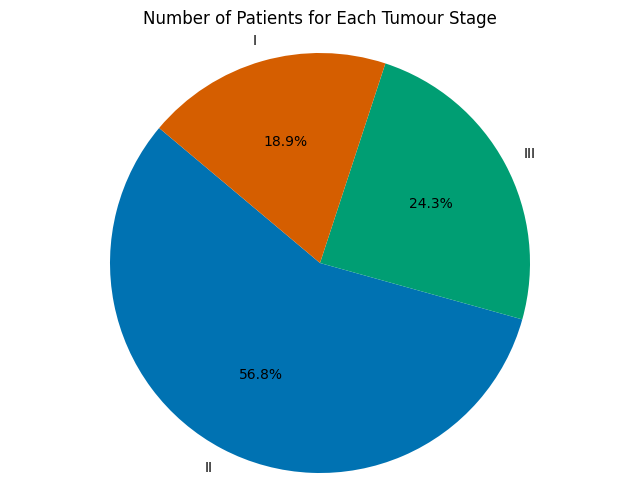

In [39]:
#Find the number of patients of each Tumour Stage and visualize it using a pie-chart.
tumour_stage_counts = df['Tumour_Stage'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(tumour_stage_counts, labels=tumour_stage_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Number of Patients for Each Tumour Stage')
plt.axis('equal')
plt.show()

In [40]:
df.value_counts("Tumour_Stage")

Tumour_Stage
II     180
III     77
I       60
dtype: int64

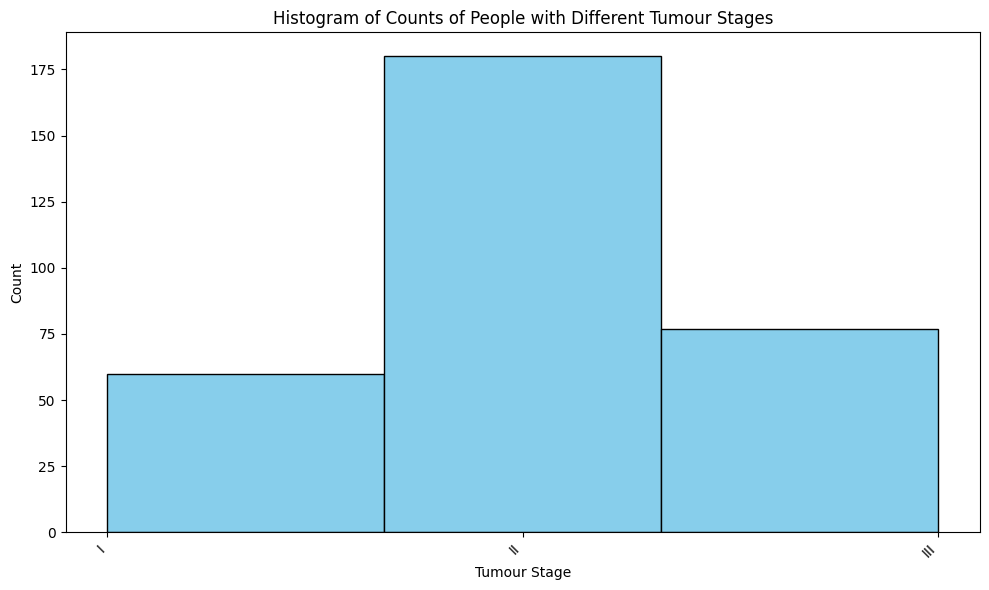

In [43]:
# Make a historgram of counts of people with different Tumor Stages
sorted_tumour_stages = df['Tumour_Stage'].sort_values()
plt.figure(figsize=(10, 6))
plt.hist(sorted_tumour_stages, bins=len(sorted_tumour_stages.unique()), color='skyblue', edgecolor='black')
plt.xlabel('Tumour Stage')
plt.ylabel('Count')
plt.title('Histogram of Counts of People with Different Tumour Stages')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [45]:
#Rename the Patient_Status as Target and Give labels Alive = 1 and Dead = 0
df.rename(columns={'Patient_Status': 'Target'}, inplace=True)

df['Target'] = df['Target'].map({'Alive': 1, 'Dead': 0})

In [47]:
#Bin the age column
# Create a new column 'age_bins' with the Age values binned as [0, 20, 40, 60, 80, 100]
age_bins = [0, 20, 40, 60, 80, 100]
df['age_bins'] = pd.cut(df['Age'], bins=age_bins, labels=['0-19', '20-39', '40-59', '60-79', '80-100'])

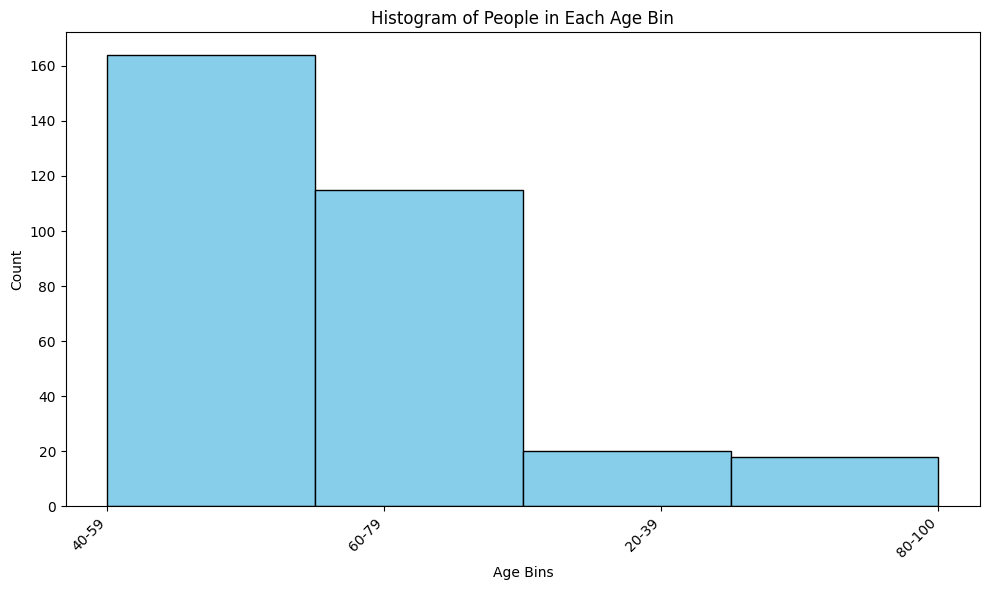

In [48]:
#plot the count of people in each age bin using a histogram
plt.figure(figsize=(10, 6))
plt.hist(df['age_bins'], bins=len(df['age_bins'].unique()), color='skyblue', edgecolor='black')
plt.xlabel('Age Bins')
plt.ylabel('Count')
plt.title('Histogram of People in Each Age Bin')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

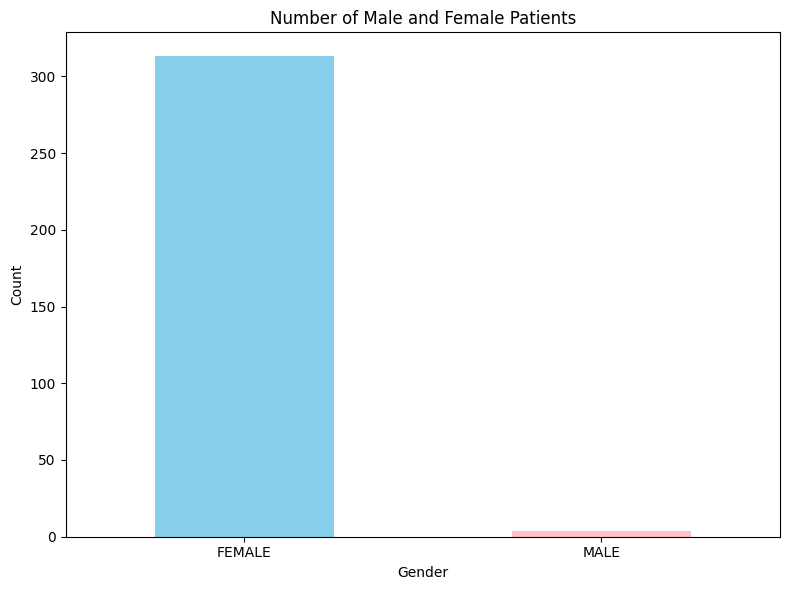

In [50]:
# Make a chart showcasing number of male and female patients in the given data, explain why the data has more values of one gender over the other
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
gender_counts.plot(kind='bar', color=['skyblue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Number of Male and Female Patients')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


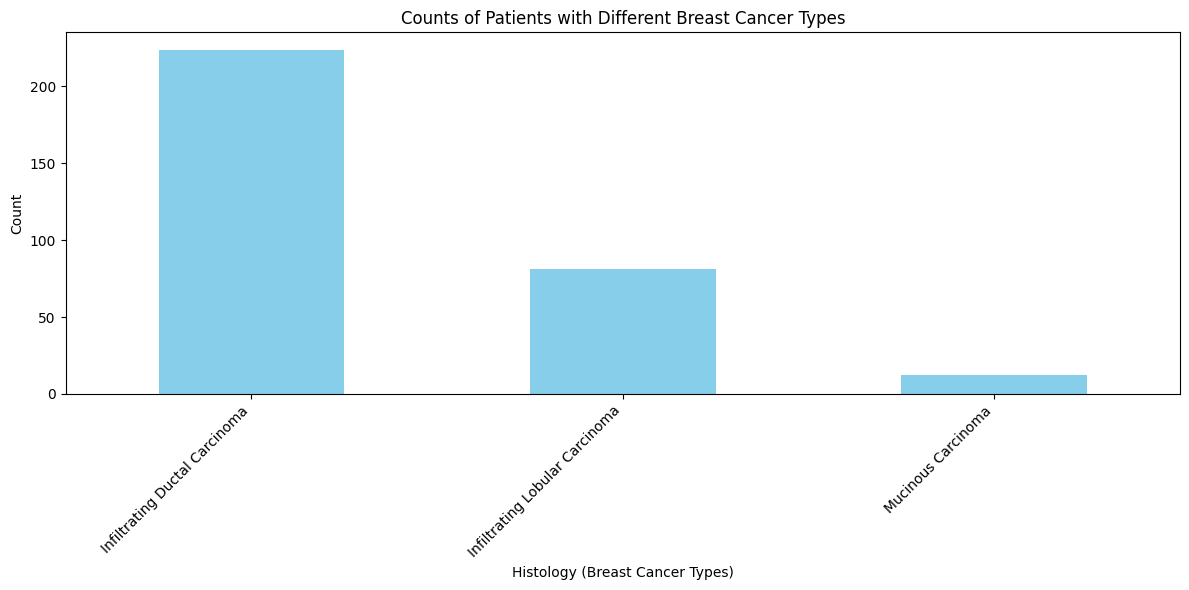

In [53]:
# diplay counts of pateints with differnent breast cancer types (Histology)
histology_counts = df['Histology'].value_counts()
plt.figure(figsize=(12, 6))
histology_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Histology (Breast Cancer Types)')
plt.ylabel('Count')
plt.title('Counts of Patients with Different Breast Cancer Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [61]:
# Find out the most frequent surgery performed
df['Surgery_type'].value_counts()
# print("Most frequent surgery performed:", most_frequent_surgery)

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

In [65]:
# Find out prevalent surgery types for each type of breast cancer
prevalent_surgery_per_cancer = df.groupby('Histology')['Surgery_type'].agg(lambda x: x.mode().iloc[0])
print("\nPrevalent surgery types for each type of breast cancer:\n", prevalent_surgery_per_cancer)


Prevalent surgery types for each type of breast cancer:
 Histology
Infiltrating Ductal Carcinoma          Other
Infiltrating Lobular Carcinoma         Other
Mucinous Carcinoma                Lumpectomy
Name: Surgery_type, dtype: object


In [80]:
# find out the co-realtion between age protien levels and the type of breast cancer (make a heatmap)

In [81]:
# What was your analysis of the entire dataset from the above colab notebook
#stage 2 tumors are more common, followed by stage 1 and 3 with similar numbers
#breast cancer is most prevelanr in middle ages and stage between middle and old age
#breast cancer is majorly seen in females simply due to the female hormones
#Infiltrating Ductal Carcinoma is most common type of breast cancer
#one of the most popular surgeries is Modified Radical Mastectomy and Lumpectomy